In [42]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

original_ufc = pd.read_csv("ufc_fighters.csv")
original_ufc.sort_values('name', ascending=False)

count = 0
tempname = []
for i, rows in original_ufc.iterrows():
    if type(rows['dob']) is str:
        spl = rows['dob'].split(' ')
        year = spl[2]
        year = int(year)
        total_fights = int(rows['win']) + int(rows['lose']) + int(rows['draw']) + int(rows['nc'])
        if year > 1979:
            if total_fights > 9:
                tempname.append(rows)
                updated_ufc = (original_ufc.name != rows['name'])
    
updated_ufc = pd.DataFrame(tempname)
updated_ufc = updated_ufc.dropna()
updated_ufc = updated_ufc.reset_index()
updated_ufc = updated_ufc.drop('index', 1)
updated_ufc

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
0,4,Rolando Dy,9,7,1,1,"5' 8""",145 lbs.,"69""",Orthodox,"Aug 11, 1990",3.04,37%,4.47,52%,0.30,20%,68%,0.0,2018-11-21 19:35:14.677808
1,5,Jessica Eye,13,6,0,1,"5' 6""",125 lbs.,"66""",Orthodox,"Jul 27, 1986",3.42,36%,3.32,59%,0.59,71%,60%,0.8,2018-11-21 19:35:17.495278
2,10,Cris Cyborg,20,1,0,1,"5' 8""",145 lbs.,"68""",Orthodox,"Jul 09, 1985",7.02,52%,1.79,70%,0.85,62%,91%,0.3,2018-11-21 19:35:36.351918
3,11,Mike Kyle,19,9,1,2,"6' 4""",205 lbs.,"77""",Orthodox,"Mar 31, 1980",4.50,51%,2.76,54%,1.55,62%,50%,0.9,2018-11-21 19:35:40.545685
4,15,Alptekin Ozkilic,9,4,0,0,"5' 5""",125 lbs.,"65""",Orthodox,"Mar 27, 1986",3.81,32%,5.72,59%,4.21,58%,75%,0.0,2018-11-21 19:35:57.905297
5,18,Michel Quinones,8,3,0,0,"5' 10""",155 lbs.,"73""",Orthodox,"Dec 22, 1984",2.91,29%,5.98,48%,0.00,0%,36%,0.0,2018-11-21 19:36:09.492357
6,28,Juan Puig,11,4,0,0,"5' 9""",145 lbs.,"72""",Orthodox,"Apr 23, 1989",4.91,23%,7.17,51%,0.00,0%,0%,0.0,2018-11-21 19:36:44.709232
7,30,Claudio Puelles,9,2,0,0,"5' 11""",155 lbs.,"72""",Southpaw,"Apr 21, 1996",2.33,38%,6.53,49%,2.33,23%,0%,0.8,2018-11-21 19:36:52.163314
8,31,Lucie Pudilova,8,3,0,0,"5' 8""",135 lbs.,"67""",Orthodox,"Jun 13, 1994",5.53,39%,5.03,53%,0.00,0%,78%,0.5,2018-11-21 19:36:54.111154
9,34,Joe Proctor,11,5,0,0,"5' 10""",155 lbs.,"72""",Orthodox,"Aug 10, 1985",3.39,36%,3.93,59%,0.00,0%,70%,1.8,2018-11-21 19:37:06.186839


1) Received data from the csv file <br>
2) Deleted the fighters that were older than 40 so that the fighters are current. We also dropped fighters who did not have a date of birth listed.<br>
3) Deleted the fighters that had less than 10 fights so that these fighters are not amatures<br>

In [43]:
def p2f(x):
    return float(x.strip('%'))/100

str_val = []
grap_val = []
def_val = []
for i, rows in updated_ufc.iterrows():
    str_val.append(float(rows["win"] -rows["lose"]) * p2f(rows["Str_Acc"]))
    grap_val.append(float(rows["win"] -rows["lose"]) * p2f(rows["TD_Acc"]) )
    #should probably add some weight to sub_avg
    #there are a lots of 0% for TD_Acc. We might have to remove those fighters.
    def_val.append(float(rows["win"] -rows["lose"]) * (p2f(rows["Str_Def"]) + p2f(rows["TD_Def"])))
    
updated_ufc['str_val'] = str_val
updated_ufc['grap_val'] = grap_val
updated_ufc['def_val'] = def_val
updated_ufc


,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,...,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated,str_val,grap_val,def_val
0,4,Rolando Dy,9,7,1,1,"5' 8""",145 lbs.,"69""",Orthodox,...,4.47,52%,0.30,20%,68%,0.0,2018-11-21 19:35:14.677808,0.74,0.40,2.40
1,5,Jessica Eye,13,6,0,1,"5' 6""",125 lbs.,"66""",Orthodox,...,3.32,59%,0.59,71%,60%,0.8,2018-11-21 19:35:17.495278,2.52,4.97,8.33
2,10,Cris Cyborg,20,1,0,1,"5' 8""",145 lbs.,"68""",Orthodox,...,1.79,70%,0.85,62%,91%,0.3,2018-11-21 19:35:36.351918,9.88,11.78,30.59
3,11,Mike Kyle,19,9,1,2,"6' 4""",205 lbs.,"77""",Orthodox,...,2.76,54%,1.55,62%,50%,0.9,2018-11-21 19:35:40.545685,5.10,6.20,10.40
4,15,Alptekin Ozkilic,9,4,0,0,"5' 5""",125 lbs.,"65""",Orthodox,...,5.72,59%,4.21,58%,75%,0.0,2018-11-21 19:35:57.905297,1.60,2.90,6.70
5,18,Michel Quinones,8,3,0,0,"5' 10""",155 lbs.,"73""",Orthodox,...,5.98,48%,0.00,0%,36%,0.0,2018-11-21 19:36:09.492357,1.45,0.00,4.20
6,28,Juan Puig,11,4,0,0,"5' 9""",145 lbs.,"72""",Orthodox,...,7.17,51%,0.00,0%,0%,0.0,2018-11-21 19:36:44.709232,1.61,0.00,3.57
7,30,Claudio Puelles,9,2,0,0,"5' 11""",155 lbs.,"72""",Southpaw,...,6.53,49%,2.33,23%,0%,0.8,2018-11-21 19:36:52.163314,2.66,1.61,3.43
8,31,Lucie Pudilova,8,3,0,0,"5' 8""",135 lbs.,"67""",Orthodox,...,5.03,53%,0.00,0%,78%,0.5,2018-11-21 19:36:54.111154,1.95,0.00,6.55
9,34,Joe Proctor,11,5,0,0,"5' 10""",155 lbs.,"72""",Orthodox,...,3.93,59%,0.00,0%,70%,1.8,2018-11-21 19:37:06.186839,2.16,0.00,7.74


Created three new columns in the dataframe. <br>
<br>
1) The first column calculates the striking values by looking at striking accuracy but also includes the fighter's record. This will allow us to sort out the best fighters later on. Best fighters do not just have good statistics but also have a winning record with a lot of fights under their belt. <br>
<br>
2) The grappling column also takes into account wins and losses while also including take down accuracy as well as submission average. While take down accuracy is a good sign of a good grappler, submission average just boosts the validity of these fighters that are good on the ground.<br>
<br>
3) Last column that was added was defense. We looked at wins, losses, strikes defended and take down defended to create the value for this column. A good defensive fighter can not only dodge strikes but also refuses to be taken down against a good grappler.

-Wins, losses,     
    -Most effective fighter overall
    -Most effective fighter for general weights(lighter, heavier)
    -Most effective fighter in different weight class
-Which type of stance is the best(look at number of wins), make a table of count for each type

In [44]:
updated_ufc['weight'] = updated_ufc['weight'].map(lambda x: x.rstrip(' lbs.'))
pd.to_numeric(updated_ufc['weight'])
updated_ufc['weight'] = updated_ufc['weight'].astype(int)

In [45]:
#Lightweight
light_df = updated_ufc[updated_ufc['weight'] == 155]

#Welterweight
welter_df = updated_ufc[updated_ufc['weight'] == 170]

#Middleweight
middle_df = updated_ufc[updated_ufc['weight'] == 185]

#Light Heavyweight
liheavy_df = updated_ufc[updated_ufc['weight'] == 205]

#Heavyweight
heavy_df = updated_ufc[updated_ufc['weight'] > 205 ]

#Orthodox
orth_df = updated_ufc[updated_ufc['stance'] == 'Orthodox']
#orth_df = orth_df.sort_values(by=['grap_val'], ascending=False)
#Southpaw
south_df = updated_ufc[updated_ufc['stance'] == 'Southpaw']

#Switch
switch_df = updated_ufc[updated_ufc['stance'] == 'Switch']


In [46]:
def linereg_func(x_val, y_val, title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val, y_val)

    plt.plot(x_val, y_val, 'o')

    plt.xlabel('Striking')
    plt.ylabel('Grappling')
    plt.title(title)
    x=x_val
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')

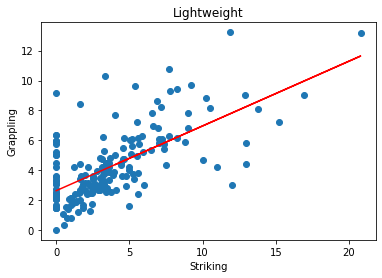

In [47]:
linereg_func(light_df.grap_val, light_df.str_val, "Lightweight")


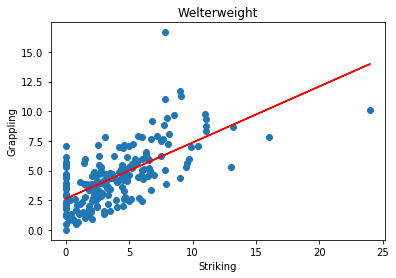

In [48]:
linereg_func(welter_df.grap_val, welter_df.str_val, "Welterweight")


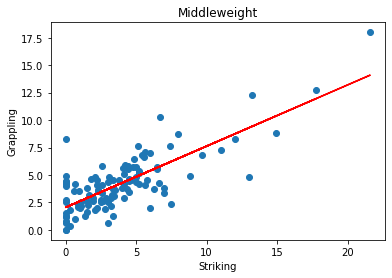

In [49]:
linereg_func(middle_df.grap_val, middle_df.str_val, "Middleweight")

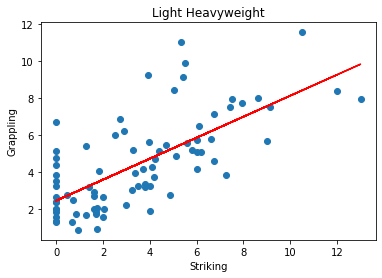

In [50]:
linereg_func(liheavy_df.grap_val, liheavy_df.str_val, "Light Heavyweight")

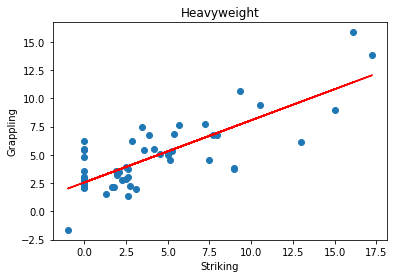

In [51]:
linereg_func(heavy_df.grap_val, heavy_df.str_val, "Heavyweight")

Text(0.5, 1.0, 'Orthodox')

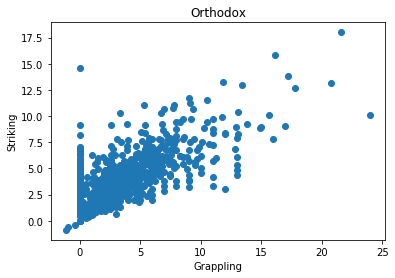

In [52]:
plt.scatter(orth_df['grap_val'], orth_df['str_val'])
plt.xlabel('Grappling')
plt.ylabel('Striking')
plt.title('Orthodox')

Text(0.5, 1.0, 'Southpaw')

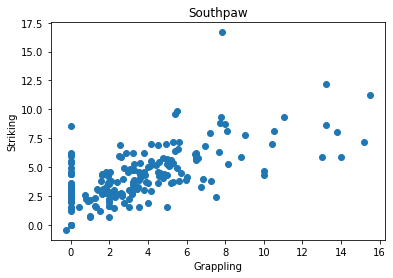

In [53]:
plt.scatter(south_df['grap_val'], south_df['str_val'])
plt.xlabel('Grappling')
plt.ylabel('Striking')
plt.title('Southpaw')

Text(0.5, 1.0, 'Switch')

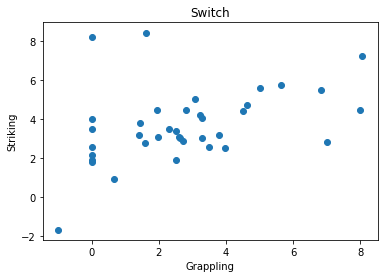

In [54]:
plt.scatter(switch_df['grap_val'], switch_df['str_val'])
plt.xlabel('Grappling')
plt.ylabel('Striking')
plt.title('Switch')